In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from Bio import motifs
from Bio import Align

In [2]:
bls_thresholds = [0.07, 0.13, 0.41, 0.54, 0.95]
bls_threshold_names = ["07", "13", "41", "54", "95"]
# count number for BLS threshold
bls_count_names = [f"C{x}" for x in bls_threshold_names]
# confidence score for BLS threshold
bls_t_names = [f"T{x}" for x in bls_threshold_names]

In [3]:
df = pd.read_csv("wheat_all_len8_degen3_alpha3.txt", sep="\t", header=None, names=[
    "motif",
    *bls_count_names,
    *bls_t_names
], index_col=False)
df

,motif,C07,C13,C41,C54,C95,T07,T13,T41,T54,T95
0,CCWCCGCC,20038,19747,16155,12544,1393,0.136042,0.183775,0.551842,0.698661,0.857143
1,GCCWCCCC,18667,17920,10342,6373,410,0.072588,0.100558,0.299942,0.406873,0.514634
2,CCGCCWCC,20094,19802,16242,12594,1446,0.138449,0.186042,0.554242,0.699857,0.862379
3,GCCCCWCC,18581,17820,10236,6162,449,0.068296,0.095511,0.292692,0.386563,0.556793
4,CGCCWCCC,18821,18174,11126,6891,488,0.080176,0.113129,0.349272,0.451458,0.592213
...,...,...,...,...,...,...,...,...,...,...,...
1612744,TGCANKGS,21624,21586,21455,21284,14979,0.014336,0.017141,0.035190,0.067140,0.520529
1612745,KGSATGCN,21607,21569,21415,21181,14365,0.013560,0.016366,0.033388,0.062603,0.500035
1612746,TGSAGCNK,21626,21591,21480,21324,15494,0.014427,0.017368,0.036313,0.068890,0.536466
1612747,CATGGNKS,21628,21590,21438,21257,14424,0.014518,0.017323,0.034425,0.065955,0.502080


In [4]:
df.isna().sum()

motif    0
C07      0
C13      0
C41      0
C54      0
C95      0
T07      0
T13      0
T41      0
T54      0
T95      0
dtype: int64

In [4]:
score_dic = {
    "A": 1,
    "T": 1,
    "C": 1,
    "G": 1,
    "R": 2,
    "Y": 2,
    "S": 2,
    "W": 2,
    "K": 2,
    "M": 2,
    "B": 3,
    "D": 3,
    "H": 3,
    "V": 3,
    "N": 4,
}

def degen_score(s):
    output = 1
    for c in s:
        output *= score_dic[c]
    return output

In [5]:
[degen_score(s) for s in ["AAA", "AAN", "RTH", "N"*8]]

[1, 4, 6, 65536]

In [6]:
df["degen"] = df.motif.apply(degen_score)
df

,motif,C07,C13,C41,C54,C95,T07,T13,T41,T54,T95,degen
0,CCWCCGCC,20038,19747,16155,12544,1393,0.136042,0.183775,0.551842,0.698661,0.857143,2
1,GCCWCCCC,18667,17920,10342,6373,410,0.072588,0.100558,0.299942,0.406873,0.514634,2
2,CCGCCWCC,20094,19802,16242,12594,1446,0.138449,0.186042,0.554242,0.699857,0.862379,2
3,GCCCCWCC,18581,17820,10236,6162,449,0.068296,0.095511,0.292692,0.386563,0.556793,2
4,CGCCWCCC,18821,18174,11126,6891,488,0.080176,0.113129,0.349272,0.451458,0.592213,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1612744,TGCANKGS,21624,21586,21455,21284,14979,0.014336,0.017141,0.035190,0.067140,0.520529,16
1612745,KGSATGCN,21607,21569,21415,21181,14365,0.013560,0.016366,0.033388,0.062603,0.500035,16
1612746,TGSAGCNK,21626,21591,21480,21324,15494,0.014427,0.017368,0.036313,0.068890,0.536466,16
1612747,CATGGNKS,21628,21590,21438,21257,14424,0.014518,0.017323,0.034425,0.065955,0.502080,16


In [7]:
df.degen.max()

64

[Text(0.5, 1.0, 'Distribution of confidence scores per BLS threshold'),
 Text(0.5, 0, 'BLS thresholds'),
 Text(0, 0.5, 'Confidence scores')]

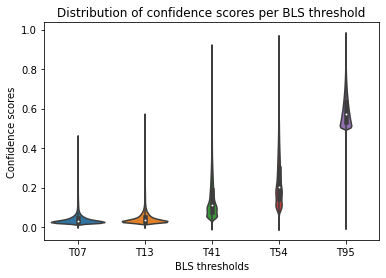

In [9]:
fig = sns.violinplot(data=df[bls_t_names].melt(var_name='threshold',  value_name='vals'), x="threshold", y="vals", kind="line")
fig.set(title="Distribution of confidence scores per BLS threshold", xlabel="BLS thresholds", ylabel="Confidence scores")

In [8]:
i = df[bls_t_names].idxmax(axis=1)
df_max = pd.DataFrame([
    i.values,
    df.lookup(i.index, i.values),
], columns = ["threshold", "value"])
df_max

<ipython-input-8-3c949742b6f2>:4: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  df.lookup(i.index, i.values),


ValueError: 2 columns passed, passed data had 1612749 columns

In [11]:
df_max = pd.DataFrame()
df_max["threshold"] = i
df_max["value"] = df.lookup(i.index, i.values)
df_max

<ipython-input-11-f02afa56440f>:3: FutureWarning: The 'lookup' method is deprecated and will beremoved in a future version.You can use DataFrame.melt and DataFrame.locas a substitute.
  df_max["value"] = df.lookup(i.index, i.values)


,threshold,value
0,T95,0.857143
1,T95,0.514634
2,T95,0.862379
3,T95,0.556793
4,T95,0.592213
...,...,...
1612744,T95,0.520529
1612745,T95,0.500035
1612746,T95,0.536466
1612747,T95,0.502080


In [12]:
df_max = df_max.sort_values(by="threshold")

In [13]:
df_max.groupby("threshold").count()

,value
threshold,
T07,1748
T13,46
T41,35
T54,8100
T95,1602820


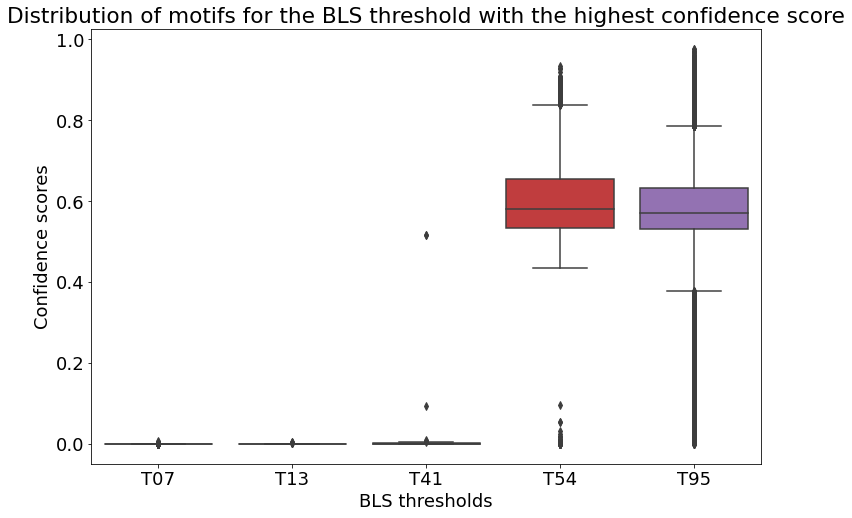

In [22]:
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(data=df_max, x="threshold", y="value", ax=ax)
fig.set(title="Distribution of motifs for the BLS threshold with the highest confidence score", xlabel="BLS thresholds", ylabel="Confidence scores")
plt.savefig("conf.svg")

RangeIndex(start=0, stop=1612749, step=1)

In [10]:
df[bls_t_names].melt(var_name='threshold',  value_name='vals')

,threshold,vals
0,T07,0.136042
1,T07,0.072588
2,T07,0.138449
3,T07,0.068296
4,T07,0.080176
...,...,...
8063740,T95,0.520529
8063741,T95,0.500035
8063742,T95,0.536466
8063743,T95,0.502080


In [13]:
df_low = df[(df[bls_t_names] < 0.02).all(axis=1)].copy()
df_high = df[df[bls_t_names].max(axis=1) > 0.88].copy()

In [14]:
df_low

,motif,C07,C13,C41,C54,C95,T07,T13,T41,T54,T95,degen
5,AMCGMVAG,21095,20960,20205,18961,5416,0.000000,0.000000,0.000000,0.000000,0.000000,12
818,YTWBGGTG,21497,21428,21169,20691,10815,0.000372,0.000140,0.000803,0.000000,0.000000,12
819,THAVGRTA,21541,21480,21263,20850,12474,0.000000,0.000000,0.000000,0.000000,0.000000,18
820,TAVACVNG,21681,21660,21592,21499,17742,0.000000,0.000000,0.000000,0.000000,0.000000,36
821,ASATTDAS,21516,21454,21232,20841,12101,0.000000,0.000000,0.000000,0.000000,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...
1605579,ASGBGACW,20902,20760,19558,17832,4097,0.000000,0.000000,0.000000,0.000000,0.000000,12
1607031,TRGGKCSA,20370,20152,17234,14031,1841,0.000000,0.000000,0.000000,0.000000,0.000000,8
1607971,CGTKSGAS,20266,20027,17153,13702,1796,0.000000,0.000000,0.000000,0.000000,0.012806,8
1609697,ATMTAWTV,21658,21632,21536,21390,16542,0.000000,0.000000,0.000000,0.000000,0.000000,12


In [15]:
df_high

,motif,C07,C13,C41,C54,C95,T07,T13,T41,T54,T95,degen
540,CMGCWGCA,20874,20716,19716,18108,4517,0.099166,0.120824,0.415500,0.591617,0.892406,4
546,CWGCMGCA,20812,20661,19611,18063,4562,0.096483,0.118484,0.412371,0.590600,0.893468,4
548,CWGCAGCM,20967,20823,20054,18767,5510,0.103162,0.125342,0.425352,0.605957,0.911797,4
653,CAGCWGCM,20986,20840,20001,18696,5305,0.103974,0.126056,0.423829,0.604461,0.908388,4
703,CAGCMGCW,20841,20705,19638,17999,4363,0.097740,0.120357,0.413179,0.589144,0.888609,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1589854,RGCAGCAR,21148,21035,20441,19459,6909,0.081568,0.095175,0.310993,0.481422,0.881748,4
1609024,YWGCTGCT,21093,20951,20314,19295,6612,0.084436,0.097609,0.318401,0.490231,0.882184,4
1609199,YTGCTGCW,21224,21117,20624,19853,8076,0.090087,0.104702,0.328646,0.504559,0.903541,4
1609623,CTGYTGCW,21084,20961,20321,19337,6735,0.084045,0.098039,0.318636,0.491338,0.884336,4


In [16]:
df_high.motif.value_counts()

STGCTGCY    1
CAGCWSCA    1
GCAGYWGC    1
RGCMTGCA    1
SAGCAKCA    1
           ..
RCAGCRGC    1
GYYGCTGC    1
GCTWGCTG    1
YTGCAGCM    1
TTGCAWGC    1
Name: motif, Length: 2208, dtype: int64

In [17]:
df_low.motif.value_counts()

AGRTTWYA    1
MAGCCGVT    1
GDTAHADA    1
GYCGBAAH    1
AGHNTAAC    1
           ..
CVGAYKTT    1
VGKTYGCC    1
CATAWMCK    1
CANTWACC    1
GGTVAVSC    1
Name: motif, Length: 2064, dtype: int64

In [18]:
df_high_motifs = df_high.motif.unique()
df_high_motifs.shape

(2208,)

In [19]:
df_low_motifs = df_low.motif.unique()
df_low_motifs.shape

(2064,)

In [20]:
def load_jaspar(location="jaspar"):
    jaspar_motifs = []
    for location in Path("jaspar").iterdir():
        with open(str(location)) as fh:
            for m in motifs.parse(fh, "jaspar"):
                jaspar_motifs.append(m)
    return jaspar_motifs

In [21]:
jaspar_motifs = load_jaspar("jaspar")
len(jaspar_motifs)

530

In [22]:
df_jaspar = pd.DataFrame([str(m.degenerate_consensus.strip("N")) for m in jaspar_motifs], columns=["motif"])
df_jaspar["motif_length"] = df_jaspar["motif"].apply(len)
df_jaspar

,motif,motif_length
0,TNCCAWWWATAGNW,14
1,TTWCCWAAWNNGGNAA,16
2,YNCAATTATTGS,12
3,AAAGC,5
4,AAAGYV,6
...,...,...
525,YGGTCAAC,8
526,TGGTCAAC,8
527,GGTCAAC,7
528,RGTCAAC,7


In [25]:
nuc = Align.substitution_matrices.load("NUC.4.4")

<AxesSubplot:>

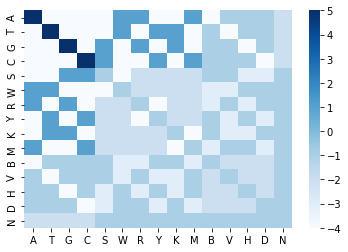

In [27]:
sns.heatmap(nuc, cmap='Blues', xticklabels=nuc.alphabet, yticklabels=nuc.alphabet)

In [28]:
def get_aligner(gap_score=-2.5):
    aligner = Align.PairwiseAligner()
    aligner.substitution_matrix = Align.substitution_matrices.load("NUC.4.4")
    aligner.mode = 'global'
    aligner.target_left_extend_gap_score = gap_score
    aligner.target_right_extend_gap_score = gap_score
    aligner.query_left_extend_gap_score = gap_score
    aligner.query_right_extend_gap_score = gap_score
    aligner.target_left_open_gap_score = gap_score
    aligner.target_right_open_gap_score = gap_score
    aligner.query_left_open_gap_score = gap_score
    aligner.query_right_open_gap_score = gap_score
    aligner.query_internal_open_gap_score = gap_score
    aligner.query_internal_extend_gap_score = gap_score
    aligner.target_internal_open_gap_score = gap_score
    aligner.target_internal_extend_gap_score = gap_score
    aligner.open_gap_score = gap_score
    aligner.extend_gap_score = gap_score
    return aligner

In [29]:
aligner = get_aligner()

In [30]:
def score(seq, motif, max_score=5):
    return aligner.score(seq, motif) / (max_score * len(motif))

def get_best_motif(seq):
    jaspar_scores = df_jaspar.motif.apply(lambda m: score(seq, m))
#     adjusted_scores = jaspar_scores * df_jaspar.motif_length
    i = np.argmax(jaspar_scores)
    return pd.Series({
        "match_score": jaspar_scores[i],
        "jaspar_motif": df_jaspar.motif[i],
        "motif": seq,
    })

In [31]:
score("AAA", "AAA")

1.0

In [32]:
score("AAA", "ARA")

0.7333333333333333

In [33]:
score("AAA", "ADA")

0.6

In [34]:
score("AAA", "ANA")

0.5333333333333333

In [35]:
score("AAA", "ATA")

0.4

In [36]:
get_best_motif("NTCVAVCG")

match_score        0.425
jaspar_motif    AGTCAACG
motif           NTCVAVCG
dtype: object

In [37]:
def get_jaspar_matches(df):
    df = df.motif.apply(get_best_motif)
    df = df.sort_values(by="match_score", ascending=False)
    df["degen"] = df.motif.apply(degen_score)
    df["jaspar_degen"] = df.jaspar_motif.apply(degen_score)
    return df

In [38]:
def plot_jaspar_matches(df, agg="max", cutoff=0.8, **kwargs):
    len_motifs = len(df)
    df = get_jaspar_matches(df)
    print(f"Fraction of matches > {cutoff}: {(df.match_score > cutoff).mean()}")
    df = df.groupby("jaspar_motif").agg({'match_score': agg}).reset_index()
    df["degen"] = df.jaspar_motif.apply(degen_score)
    print(f"Fraction of jaspar motifs matched > {cutoff}: {(df.match_score > cutoff).sum() / len(jaspar_motifs)}")
    
    norm = plt.Normalize(df["degen"].min(), df["degen"].max())
    sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
    sm.set_array([])

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x="match_score", ax=ax_box)
    sns.histplot(data=df, x="match_score", ax=ax_hist, bins=20, hue="degen", palette="Reds")

    ax_hist.get_legend().remove()
    ax_box.set(yticks=[], xlim=[0, 1])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    ax_hist.figure.colorbar(sm)

In [39]:
def plot_matches_to_jaspar(df, agg="max", cutoff=0.8, axis=None, **kwargs):
    len_motifs = len(df)
    df = get_jaspar_matches(df)
    print(f"Fraction of matches > {cutoff}: {(df.match_score > cutoff).mean()}")
    df_jaspar = df.groupby("jaspar_motif").agg({'match_score': agg}).reset_index()
    print(f"Fraction of jaspar motifs matched > {cutoff}: {(df_jaspar.match_score > cutoff).sum() / len(jaspar_motifs)}")
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x="match_score", ax=ax_box)
    sns.histplot(data=df, x="match_score", ax=ax_hist, bins=20, hue="degen")

    ax_box.set(yticks=[], xlim=[0, 1])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

<AxesSubplot:>

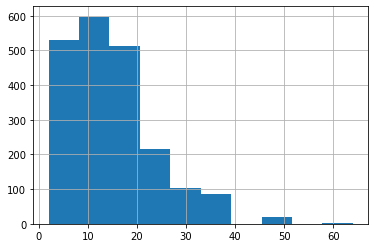

In [40]:
df_low.degen.hist()

<AxesSubplot:>

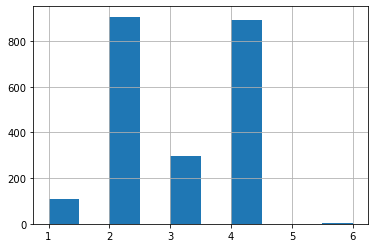

In [41]:
df_high.degen.hist()

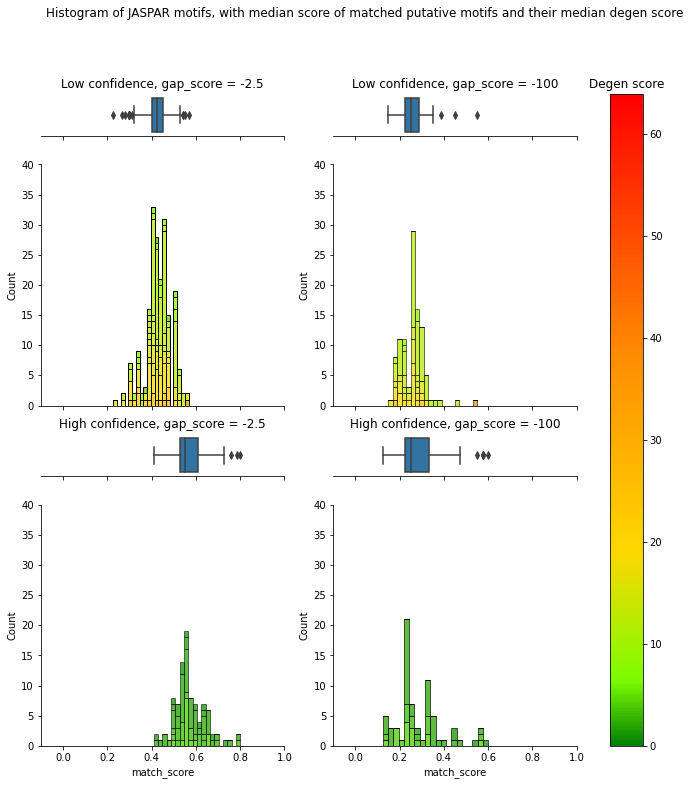

In [42]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import Normalize, LinearSegmentedColormap

limit = None

fig = plt.figure(figsize=(12,12))

colors = ["green", "lawngreen", "gold", "darkorange", "red"]
nodes = [0, .1, .3, .6, 1.0]
palette = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
norm = Normalize(0, 64)
        
# gridspec inside gridspec
axes = fig.subplots(4,2, sharex=True, gridspec_kw={
             "height_ratios": (.15, .85, .15, .85),
             "width_ratios": (.5, .5)
         })

def plot_helper(df, ax_box, ax_hist):
    df = df.groupby("jaspar_motif").agg({"match_score": "median", "degen": "median"})
    sns.boxplot(data=df, x="match_score", ax=ax_box)
    ax_box.set(xlabel=None)
#     df.degen /= 64
    sns.histplot(data=df, x="match_score", ax=ax_hist, bins=20, hue="degen", multiple="stack", palette=palette, hue_norm=norm)

    ax_box.set(yticks=[], xlim=[-.1, 1])
    ax_hist.set(ylim=[0, 40])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

    # Remove the legend and add a colorbar
    ax_hist.get_legend().remove()
    
aligner = get_aligner()

ax_box = axes[0,0]
ax_hist = axes[1,0]
df_ax1 = get_jaspar_matches(df_low[:limit])
plot_helper(df_ax1, ax_box, ax_hist)

ax_box = axes[2,0]
ax_hist = axes[3,0]
df_ax1 = get_jaspar_matches(df_high[:limit])
plot_helper(df_ax1, ax_box, ax_hist)


aligner = get_aligner(-100)

ax_box = axes[0,1]
ax_hist = axes[1,1]
df_ax1 = get_jaspar_matches(df_low[:limit])
plot_helper(df_ax1, ax_box, ax_hist)

ax_box = axes[2,1]
ax_hist = axes[3,1]
df_ax1 = get_jaspar_matches(df_high[:limit])
plot_helper(df_ax1, ax_box, ax_hist)

sm = plt.cm.ScalarMappable(norm, cmap=palette)
# sm.set_array([])

fig.colorbar(sm, ax=axes).ax.set_title("Degen score")

plt.suptitle("Histogram of JASPAR motifs, with median score of matched putative motifs and their median degen score")
axes[0,0].set_title('Low confidence, gap_score = -2.5')
axes[2,0].set_title('High confidence, gap_score = -2.5')
axes[0,1].set_title('Low confidence, gap_score = -100')
axes[2,1].set_title('High confidence, gap_score = -100')
plt.show()

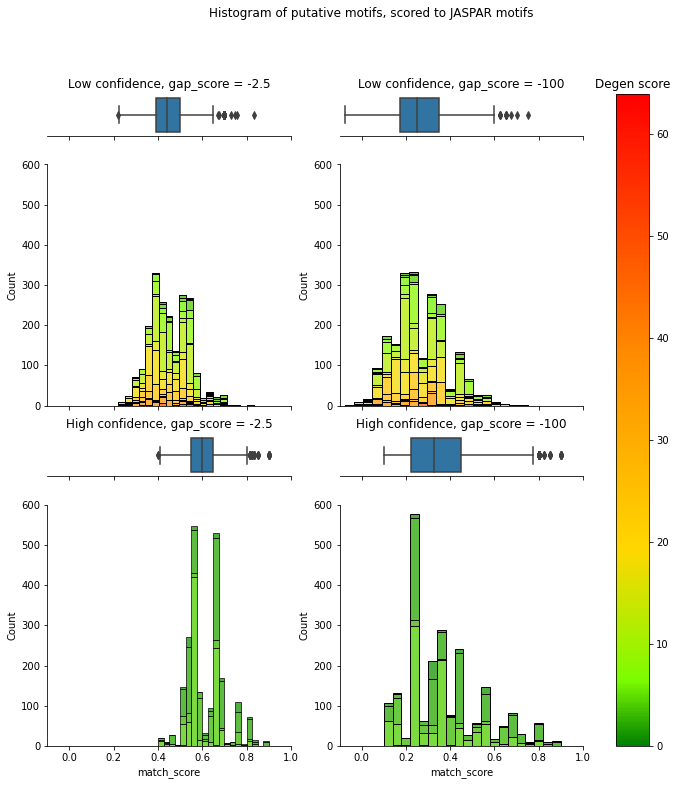

In [43]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import Normalize, LinearSegmentedColormap

limit = None

fig = plt.figure(figsize=(12,12))

colors = ["green", "lawngreen", "gold", "darkorange", "red"]
nodes = [0, .1, .3, .6, 1.0]
palette = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
norm = Normalize(0, 64)
        
# gridspec inside gridspec
axes = fig.subplots(4,2, sharex=True, gridspec_kw={
             "height_ratios": (.15, .85, .15, .85),
             "width_ratios": (.5, .5)
         })

def plot_helper(df, ax_box, ax_hist):
    sns.boxplot(data=df, x="match_score", ax=ax_box)
    ax_box.set(xlabel=None)
#     df.degen /= 64
    sns.histplot(data=df, x="match_score", ax=ax_hist, bins=20, hue="degen", multiple="stack", palette=palette, hue_norm=norm)

    ax_box.set(yticks=[], xlim=[-.1, 1])
    ax_hist.set(ylim=[0, 600])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

    # Remove the legend and add a colorbar
    ax_hist.get_legend().remove()
    
aligner = get_aligner()

ax_box = axes[0,0]
ax_hist = axes[1,0]
df_ax1 = get_jaspar_matches(df_low[:limit])
plot_helper(df_ax1, ax_box, ax_hist)

ax_box = axes[2,0]
ax_hist = axes[3,0]
df_ax1 = get_jaspar_matches(df_high[:limit])
plot_helper(df_ax1, ax_box, ax_hist)


aligner = get_aligner(-100)

ax_box = axes[0,1]
ax_hist = axes[1,1]
df_ax1 = get_jaspar_matches(df_low[:limit])
plot_helper(df_ax1, ax_box, ax_hist)

ax_box = axes[2,1]
ax_hist = axes[3,1]
df_ax1 = get_jaspar_matches(df_high[:limit])
plot_helper(df_ax1, ax_box, ax_hist)

sm = plt.cm.ScalarMappable(norm, cmap=palette)
# sm.set_array([])

fig.colorbar(sm, ax=axes).ax.set_title("Degen score")

plt.suptitle("Histogram of putative motifs, scored to JASPAR motifs")
axes[0,0].set_title('Low confidence, gap_score = -2.5')
axes[2,0].set_title('High confidence, gap_score = -2.5')
axes[0,1].set_title('Low confidence, gap_score = -100')
axes[2,1].set_title('High confidence, gap_score = -100')
plt.show()

## Random matches

In [149]:
import random

def reverse_motifs(df):
    df = df.copy()
    df.motif = df.motif.apply(lambda x: x[::-1])
    return df

def shuffled_motifs(df):
    df = df.copy()
    df.motif = df.motif.apply(lambda x: "".join(random.sample(x, len(x))))
    return df

def random_motifs(df):
    df = df.copy()
    df.motif = df.motif.apply(lambda x: "".join(random.sample("ACGTRYSWKMBDHVN", len(x))))
    return df

print(df_low[:10].motif)
print(reverse_motifs(df_low[:10]).motif)
print(shuffled_motifs(df_low[:10]).motif)
print(random_motifs(df_low[:10]).motif)

5       AMCGMVAG
818     YTWBGGTG
819     THAVGRTA
820     TAVACVNG
821     ASATTDAS
1808    CCKBAAGR
1980    RCABCCKA
2596    CCGKKKAG
6580    GCGCRKRA
6785    SACCYCNA
Name: motif, dtype: object
5       GAVMGCMA
818     GTGGBWTY
819     ATRGVAHT
820     GNVCAVAT
821     SADTTASA
1808    RGAABKCC
1980    AKCCBACR
2596    GAKKKGCC
6580    ARKRCGCG
6785    ANCYCCAS
Name: motif, dtype: object
5       AGVAMCGM
818     TBTGYGGW
819     AARVTGHT
820     GAVVANCT
821     AASATSDT
1808    RBCACKAG
1980    ABCAKRCC
2596    AKCKCGGK
6580    RKAGGCRC
6785    ASAYCCNC
Name: motif, dtype: object
5       YTMGVWHC
818     THWSCBYR
819     HDNSABGW
820     HGBMCSVA
821     YSKGAVHC
1808    GMAVYWKC
1980    HVRKYBSN
2596    NAHCDMSK
6580    WDHKCANS
6785    CDHNGMTS
Name: motif, dtype: object


In [152]:
df_low_rev = reverse_motifs(df_low)
df_high_rev = reverse_motifs(df_high)
df_low_shuffled = shuffled_motifs(df_low)
df_high_shuffled = shuffled_motifs(df_high)
df_low_random = random_motifs(df_low)
df_high_random = random_motifs(df_high)

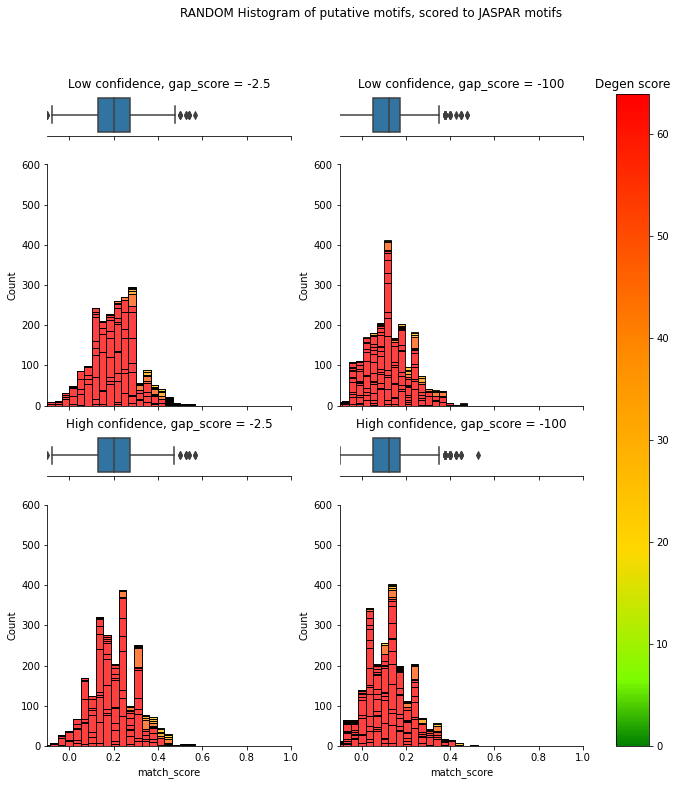

In [153]:
limit = None

fig = plt.figure(figsize=(12,12))

colors = ["green", "lawngreen", "gold", "darkorange", "red"]
nodes = [0, .1, .3, .6, 1.0]
palette = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
norm = Normalize(0, 64)
        
# gridspec inside gridspec
axes = fig.subplots(4,2, sharex=True, gridspec_kw={
             "height_ratios": (.15, .85, .15, .85),
             "width_ratios": (.5, .5)
         })
    
aligner = get_aligner()

ax_box = axes[0,0]
ax_hist = axes[1,0]
df_ax1 = get_jaspar_matches(df_low_random[:limit])
plot_helper(df_ax1, ax_box, ax_hist)

ax_box = axes[2,0]
ax_hist = axes[3,0]
df_ax1 = get_jaspar_matches(df_high_random[:limit])
plot_helper(df_ax1, ax_box, ax_hist)


aligner = get_aligner(-100)

ax_box = axes[0,1]
ax_hist = axes[1,1]
df_ax1 = get_jaspar_matches(df_low_random[:limit])
plot_helper(df_ax1, ax_box, ax_hist)

ax_box = axes[2,1]
ax_hist = axes[3,1]
df_ax1 = get_jaspar_matches(df_high_random[:limit])
plot_helper(df_ax1, ax_box, ax_hist)

sm = plt.cm.ScalarMappable(norm, cmap=palette)

fig.colorbar(sm, ax=axes).ax.set_title("Degen score")

plt.suptitle("RANDOM Histogram of putative motifs, scored to JASPAR motifs")
axes[0,0].set_title('Low confidence, gap_score = -2.5')
axes[2,0].set_title('High confidence, gap_score = -2.5')
axes[0,1].set_title('Low confidence, gap_score = -100')
axes[2,1].set_title('High confidence, gap_score = -100')
plt.show()

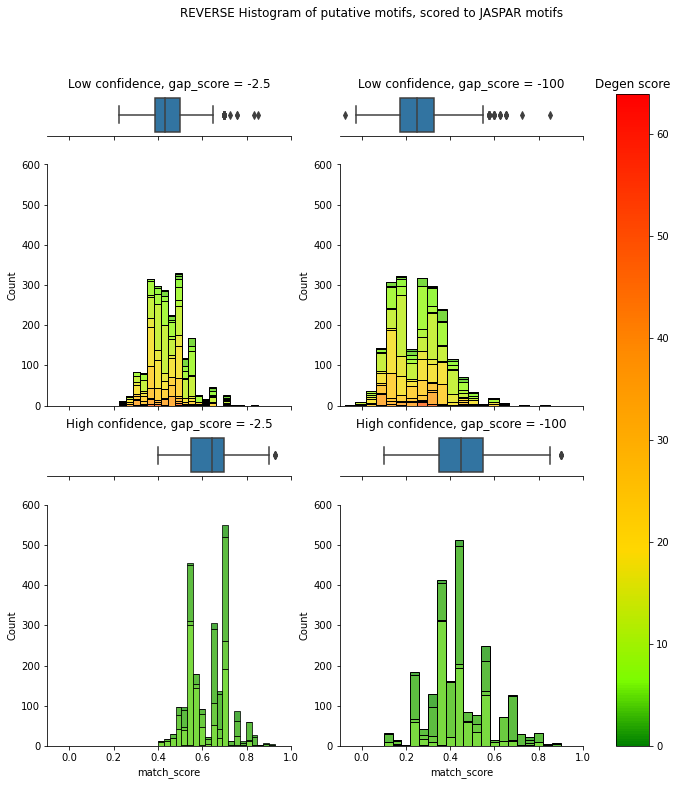

In [154]:
limit = None

fig = plt.figure(figsize=(12,12))

colors = ["green", "lawngreen", "gold", "darkorange", "red"]
nodes = [0, .1, .3, .6, 1.0]
palette = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
norm = Normalize(0, 64)
        
# gridspec inside gridspec
axes = fig.subplots(4,2, sharex=True, gridspec_kw={
             "height_ratios": (.15, .85, .15, .85),
             "width_ratios": (.5, .5)
         })
    
aligner = get_aligner()

ax_box = axes[0,0]
ax_hist = axes[1,0]
df_ax1 = get_jaspar_matches(df_low_rev[:limit])
plot_helper(df_ax1, ax_box, ax_hist)

ax_box = axes[2,0]
ax_hist = axes[3,0]
df_ax1 = get_jaspar_matches(df_high_rev[:limit])
plot_helper(df_ax1, ax_box, ax_hist)


aligner = get_aligner(-100)

ax_box = axes[0,1]
ax_hist = axes[1,1]
df_ax1 = get_jaspar_matches(df_low_rev[:limit])
plot_helper(df_ax1, ax_box, ax_hist)

ax_box = axes[2,1]
ax_hist = axes[3,1]
df_ax1 = get_jaspar_matches(df_high_rev[:limit])
plot_helper(df_ax1, ax_box, ax_hist)

sm = plt.cm.ScalarMappable(norm, cmap=palette)

fig.colorbar(sm, ax=axes).ax.set_title("Degen score")

plt.suptitle("REVERSE Histogram of putative motifs, scored to JASPAR motifs")
axes[0,0].set_title('Low confidence, gap_score = -2.5')
axes[2,0].set_title('High confidence, gap_score = -2.5')
axes[0,1].set_title('Low confidence, gap_score = -100')
axes[2,1].set_title('High confidence, gap_score = -100')
plt.show()

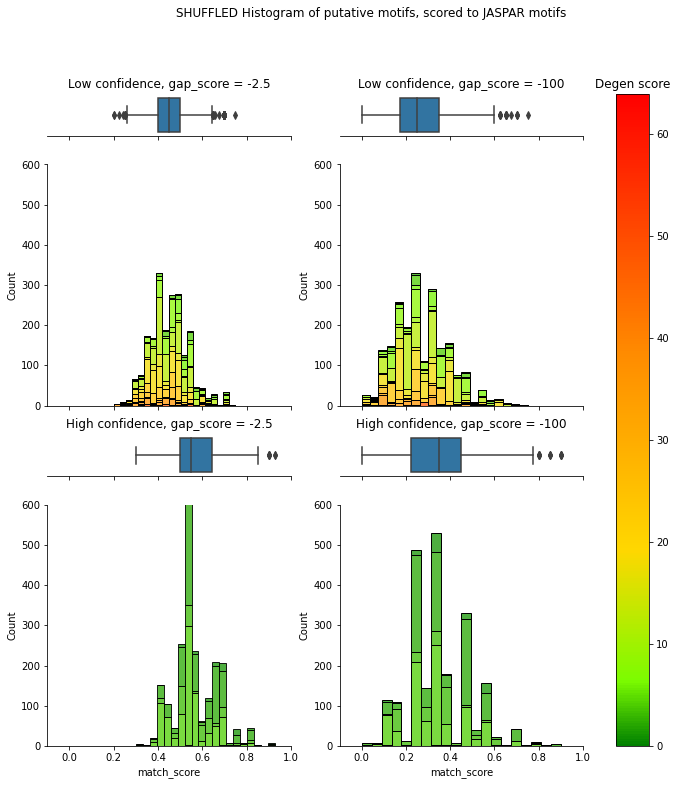

In [155]:
limit = None

fig = plt.figure(figsize=(12,12))

colors = ["green", "lawngreen", "gold", "darkorange", "red"]
nodes = [0, .1, .3, .6, 1.0]
palette = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
norm = Normalize(0, 64)
        
# gridspec inside gridspec
axes = fig.subplots(4,2, sharex=True, gridspec_kw={
             "height_ratios": (.15, .85, .15, .85),
             "width_ratios": (.5, .5)
         })
    
aligner = get_aligner()

ax_box = axes[0,0]
ax_hist = axes[1,0]
df_ax1 = get_jaspar_matches(df_low_shuffled[:limit])
plot_helper(df_ax1, ax_box, ax_hist)

ax_box = axes[2,0]
ax_hist = axes[3,0]
df_ax1 = get_jaspar_matches(df_high_shuffled[:limit])
plot_helper(df_ax1, ax_box, ax_hist)


aligner = get_aligner(-100)

ax_box = axes[0,1]
ax_hist = axes[1,1]
df_ax1 = get_jaspar_matches(df_low_shuffled[:limit])
plot_helper(df_ax1, ax_box, ax_hist)

ax_box = axes[2,1]
ax_hist = axes[3,1]
df_ax1 = get_jaspar_matches(df_high_shuffled[:limit])
plot_helper(df_ax1, ax_box, ax_hist)

sm = plt.cm.ScalarMappable(norm, cmap=palette)

fig.colorbar(sm, ax=axes).ax.set_title("Degen score")

plt.suptitle("SHUFFLED Histogram of putative motifs, scored to JASPAR motifs")
axes[0,0].set_title('Low confidence, gap_score = -2.5')
axes[2,0].set_title('High confidence, gap_score = -2.5')
axes[0,1].set_title('Low confidence, gap_score = -100')
axes[2,1].set_title('High confidence, gap_score = -100')
plt.show()

## Jaspar motifs and degen

In [44]:
get_jaspar_matches(df_high).degen.mean()

2.8990036231884058

In [45]:
get_jaspar_matches(df_low).degen.mean()

15.36531007751938

In [46]:
def plot_degen(df):
    df = get_jaspar_matches(df)
    sns.histplot(data=df, x="match_score", hue="degen")

In [47]:
bla = get_jaspar_matches(df_high).groupby("jaspar_motif").agg({'match_score': "max"}).reset_index()
bla

,jaspar_motif,match_score
0,AAATATCT,0.325
1,AACGGTCA,0.325
2,AAGATACG,0.225
3,AATGATTG,0.550
4,ACACGCAA,0.550
...,...,...
66,TTGCGTRT,0.575
67,WRMCCTAR,0.600
68,YAACCGMC,0.250
69,YAATCATK,0.475


Fraction of matches > 0.8: 0.009510869565217392
Fraction of jaspar motifs matched > 0.8: 0.009433962264150943


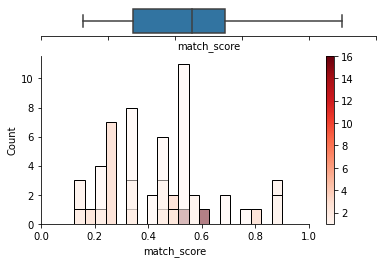

In [48]:
plot_jaspar_matches(df_high)

Fraction of matches > 0.8: 0.0
Fraction of jaspar motifs matched > 0.8: 0.0


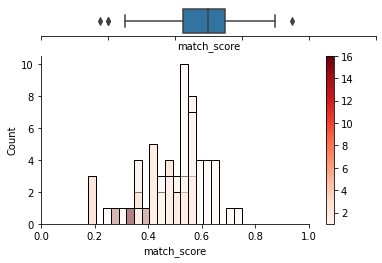

In [49]:
plot_jaspar_matches(df_low)

Skew for high to right.
Low distributed around 0.5.

In [50]:
get_jaspar_matches(df_high)

,match_score,jaspar_motif,motif,degen,jaspar_degen
1112554,0.9,CTGCATGC,CTGCAWGC,2,1
601675,0.9,CTGCATGC,CTGCATGY,2,1
769269,0.9,CTGCATGC,CTGCAYGC,2,1
1112524,0.9,CTGCATGC,CWGCATGC,2,1
1466950,0.9,CTGCATGC,CTGCAKGC,2,1
...,...,...,...,...,...
1383908,0.1,CCTCGTAC,CATGGCAK,2,1
963108,0.1,CCTCGTAC,CATGGCAW,2,1
1450634,0.1,GCCGACAT,GRCGGCGG,2,1
88047,0.1,GCCGACAT,GKCGGCGG,2,1


In [51]:
get_jaspar_matches(df_low)

,match_score,jaspar_motif,motif,degen,jaspar_degen
241366,0.750,GTTAACCA,RBTAACCA,6,1
155007,0.700,TAACCGTT,YAWCCGKT,8,1
1184203,0.675,TAACCGTT,TAACSGTG,2,1
449437,0.650,CGTTGACC,CGTTRAYB,12,1
44186,0.650,GTTAGGTA,STTAGKHA,12,1
...,...,...,...,...,...
461634,-0.025,TGTACGGA,YRCAGBGT,12,1
136727,-0.025,ATGTCGGY,DTCYTRGG,12,2
330563,-0.025,GTRATTAR,GTSTDAVG,18,4
12039,-0.025,YACGTAAY,ARGGKGAN,16,4


Disallowing gaps heavily impacts the less degenerated high, but the top hits do remain.

In [52]:
aligner = get_aligner(-100)

Fraction of matches > 0.8: 0.009510869565217392
Fraction of jaspar motifs matched > 0.8: 0.009433962264150943


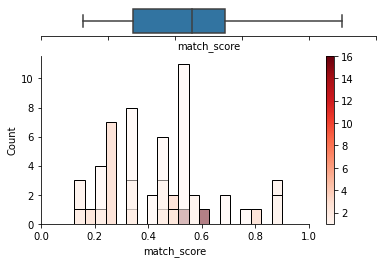

In [53]:
plot_jaspar_matches(df_high)

Fraction of matches > 0.8: 0.0
Fraction of jaspar motifs matched > 0.8: 0.0


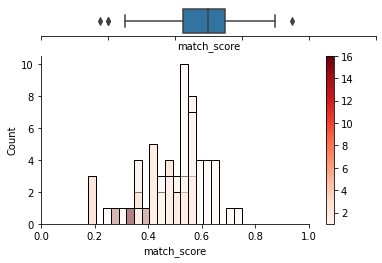

In [54]:
plot_jaspar_matches(df_low)

In [55]:
get_jaspar_matches(df_high)

,match_score,jaspar_motif,motif,degen,jaspar_degen
1112554,0.9,CTGCATGC,CTGCAWGC,2,1
601675,0.9,CTGCATGC,CTGCATGY,2,1
769269,0.9,CTGCATGC,CTGCAYGC,2,1
1112524,0.9,CTGCATGC,CWGCATGC,2,1
1466950,0.9,CTGCATGC,CTGCAKGC,2,1
...,...,...,...,...,...
1383908,0.1,CCTCGTAC,CATGGCAK,2,1
963108,0.1,CCTCGTAC,CATGGCAW,2,1
1450634,0.1,GCCGACAT,GRCGGCGG,2,1
88047,0.1,GCCGACAT,GKCGGCGG,2,1


In [56]:
get_jaspar_matches(df_low)

,match_score,jaspar_motif,motif,degen,jaspar_degen
241366,0.750,GTTAACCA,RBTAACCA,6,1
155007,0.700,TAACCGTT,YAWCCGKT,8,1
1184203,0.675,TAACCGTT,TAACSGTG,2,1
449437,0.650,CGTTGACC,CGTTRAYB,12,1
44186,0.650,GTTAGGTA,STTAGKHA,12,1
...,...,...,...,...,...
461634,-0.025,TGTACGGA,YRCAGBGT,12,1
136727,-0.025,ATGTCGGY,DTCYTRGG,12,2
330563,-0.025,GTRATTAR,GTSTDAVG,18,4
12039,-0.025,YACGTAAY,ARGGKGAN,16,4


In [57]:
def degen_fraction(df):
    return df.motif.str.replace("[ACGT]", "").str.len() / df.motif.str.len()

In [58]:
df_low_degen = degen_fraction(df_low)
df_low_degen

5          0.375
818        0.375
819        0.375
820        0.375
821        0.375
           ...  
1605579    0.375
1607031    0.375
1607971    0.375
1609697    0.375
1609698    0.375
Name: motif, Length: 2064, dtype: float64

<AxesSubplot:>

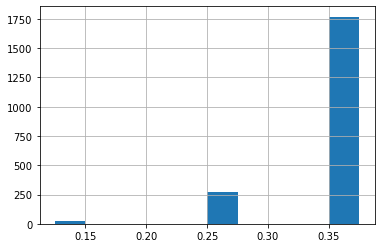

In [59]:
df_low_degen.hist()

<AxesSubplot:>

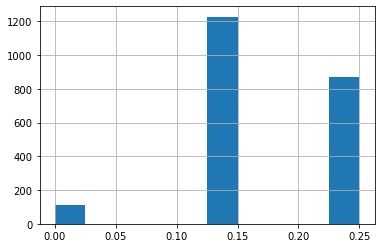

In [60]:
degen_fraction(df_high).hist()

## Orthogroups

array([[<AxesSubplot:title={'center':'C07'}>,
        <AxesSubplot:title={'center':'C13'}>],
       [<AxesSubplot:title={'center':'C41'}>,
        <AxesSubplot:title={'center':'C54'}>],
       [<AxesSubplot:title={'center':'C95'}>, <AxesSubplot:>]],
      dtype=object)

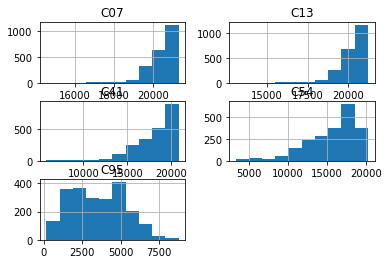

In [61]:
df_high[bls_count_names].hist()

array([[<AxesSubplot:title={'center':'C07'}>,
        <AxesSubplot:title={'center':'C13'}>],
       [<AxesSubplot:title={'center':'C41'}>,
        <AxesSubplot:title={'center':'C54'}>],
       [<AxesSubplot:title={'center':'C95'}>, <AxesSubplot:>]],
      dtype=object)

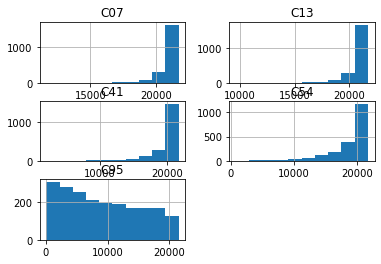

In [62]:
df_low[bls_count_names].hist()

In [63]:
df_high_counts = get_jaspar_matches(df_high.iloc[:,:-1]).merge(df, on="motif", how="left")
df_high_counts

,match_score,jaspar_motif,motif,degen_x,jaspar_degen,C07,C13,C41,C54,C95,T07,T13,T41,T54,T95,degen_y
0,0.9,CTGCATGC,CTGCAWGC,2,1,19456,19079,14370,10809,1176,0.232936,0.310027,0.718580,0.828569,0.914116,2
1,0.9,CTGCATGC,CTGCATGY,2,1,19647,19265,15099,11628,1541,0.195297,0.255801,0.651964,0.781390,0.914341,2
2,0.9,CTGCATGC,CTGCAYGC,2,1,18964,18440,12820,9173,942,0.207551,0.282267,0.683463,0.798975,0.889597,2
3,0.9,CTGCATGC,CWGCATGC,2,1,19259,18837,13713,9995,1082,0.225090,0.301163,0.705097,0.814607,0.906654,2
4,0.9,CTGCATGC,CTGCAKGC,2,1,19171,18689,13286,9580,966,0.217829,0.293916,0.697426,0.809290,0.895445,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,0.1,CCTCGTAC,CATGGCAK,2,1,19620,19260,14792,11089,1095,0.214118,0.283074,0.685844,0.800884,0.894977,2
2204,0.1,CCTCGTAC,CATGGCAW,2,1,19936,19671,15969,12444,1359,0.199539,0.264603,0.658338,0.782867,0.896247,2
2205,0.1,GCCGACAT,GRCGGCGG,2,1,20512,20306,18252,15656,2862,0.147523,0.188811,0.572540,0.724259,0.921034,2
2206,0.1,GCCGACAT,GKCGGCGG,2,1,20363,20130,17622,14718,2381,0.151206,0.196920,0.571672,0.723332,0.906762,2


In [64]:
df_low_counts = get_jaspar_matches(df_low.iloc[:,:-1]).merge(df, on="motif", how="left")

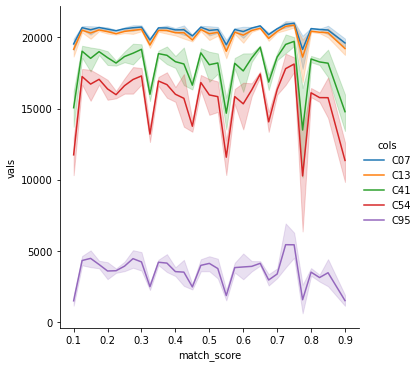

In [65]:
melted = df_high_counts[["match_score"] + bls_count_names].melt('match_score', var_name='cols',  value_name='vals')
sns.relplot(data=melted, x="match_score", y="vals", hue="cols", kind="line")

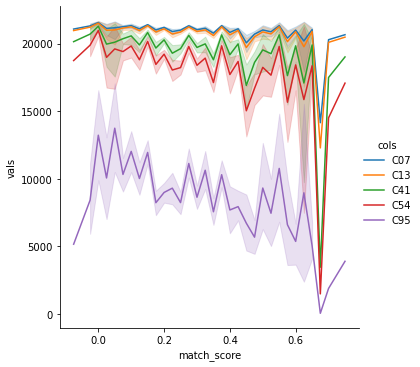

In [66]:
melted = df_low_counts[["match_score"] + bls_count_names].melt('match_score', var_name='cols',  value_name='vals')
sns.relplot(data=melted, x="match_score", y="vals", hue="cols", kind="line")